In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
tau = 10.
eta_0 = 0.1
tau_adapt = 10.
rho_0 = 1.
v = 0
delta_u = 1.
mu_M = 0.1
mu_Q = 0.00001
tau_G = 10.
tau_baseline = 100.
dt = 1.

In [162]:
num_neurons = 5
num_timebins = 1000

weights = np.random.normal(loc = 0, scale = 0.1, size = (num_neurons, num_neurons))
# weights = np.array(
#     [[0, 0.1],
#     [0, 0]]
# )
# weights = np.ones((num_neurons, num_neurons))
np.fill_diagonal(weights, 0)
phi = np.zeros(shape = (num_neurons, num_timebins))
rho = np.zeros(shape = (num_neurons, num_timebins))
eta = np.zeros(shape = (num_neurons, num_timebins))
u = np.zeros(shape = (num_neurons, num_timebins))
spikes = np.zeros(shape = (num_neurons, num_timebins))
spike_probs = np.zeros(shape = (num_neurons, num_timebins))

# phi[:, 0] = np.random.normal(loc = 0.0, scale = 0.1, size = num_neurons)
phi[:, 0] = np.zeros(num_neurons)
# eta[:, 0] = np.random.normal(loc = 0.0, scale = 0.1, size = num_neurons)
eta[:, 0] = np.zeros(num_neurons)
u[:, 0] = np.matmul(weights, phi[:, 0]) - eta[:, 0]
rho[:, 0] = rho_0 * np.exp(u[:, 0])
spike_probs[:, 0] = 1-np.exp(-rho[:, 0])
spikes[:, 0] = np.random.binomial(n = 1, p = spike_probs[:, 0])



In [163]:
def to_binary(mult):
    a = mult > 0
    return a.astype(int)


In [164]:

for tt in range(1, num_timebins):
        
    for ii in range(num_neurons):
        
        dphi = dt * (1 / tau) * (spikes[:, tt - 1] - phi[:, tt - 1])
        deta = dt * (1 / tau_adapt) * (spikes[:, tt - 1] - eta[:, tt - 1])
        
        phi[:, tt] = phi[:, tt - 1] + dphi
        eta[:, tt] = eta[:, tt - 1] + deta
        
#         bool_array = (spikes[:, :tt] > 0).astype(int)
#         last_spike_time = tt - (np.argmax(bool_array[:, ::-1], axis=1))
#         s = np.ones(num_neurons) * tt - last_spike_time
#         eta[:, tt] = np.exp(-(dt * s) / tau_adapt)
                
        total_potential = np.matmul(weights, phi[:, tt]) - eta_0 * eta[:, tt]
        u[:, tt] = total_potential
        
        rho[:, tt] = rho_0 * np.exp((u[:, tt] - v) / delta_u)
        
#         spikes[:, tt] = np.random.poisson(rho[:, tt])
        spike_probs[:, tt] = 1-np.exp(-dt*rho[:, tt])
        spikes[:, tt] = np.random.binomial(n = 1, p = spike_probs[:, tt])

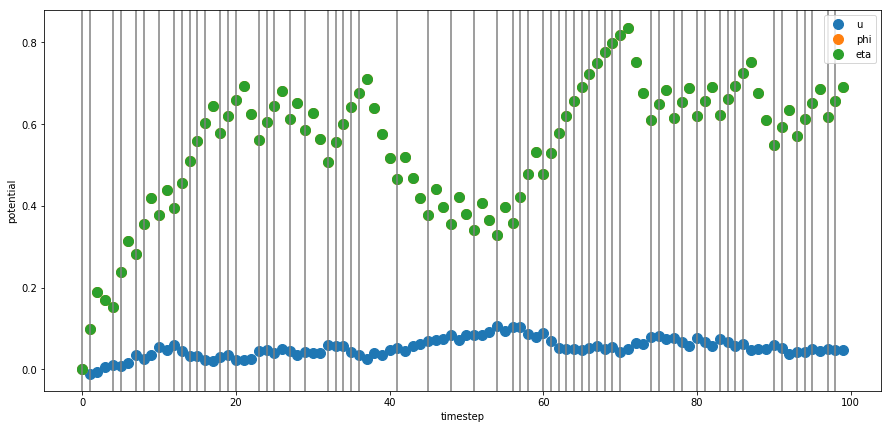

In [165]:
fig, ax = plt.subplots(figsize=(15, 7))
neuron_num = 1
start_idx = 0
sess_length = 100
end_idx = start_idx + sess_length
plt.plot(u[neuron_num, start_idx:end_idx], label = "u", linewidth = 0, marker='o', markersize=10)
plt.plot(phi[neuron_num, start_idx:end_idx], label = "phi", linewidth = 0, marker='o', markersize=10)
plt.plot(eta[neuron_num, start_idx:end_idx], label = "eta", linewidth = 0, marker='o', markersize=10)
plt.legend()
spike_times = spikes[neuron_num, start_idx:end_idx] > 0
# spike_times = np.sum(spikes, axis=0)[start_idx:end_idx] > 0
xcoords = np.arange(sess_length)[spike_times] * 1.0
for i in xcoords:
    plt.axvline(x=i, color ='gray')
    
plt.xlabel("timestep")
plt.ylabel("potential")


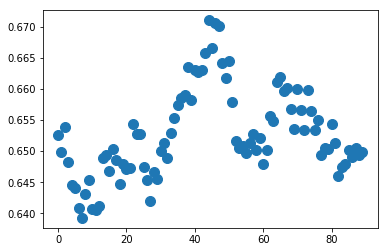

In [166]:
plt.plot(spike_probs[neuron_num, 10:end_idx], label = "eta", linewidth = 0, marker='o', markersize=10)


In [167]:
(1 / tau_adapt)

0.1

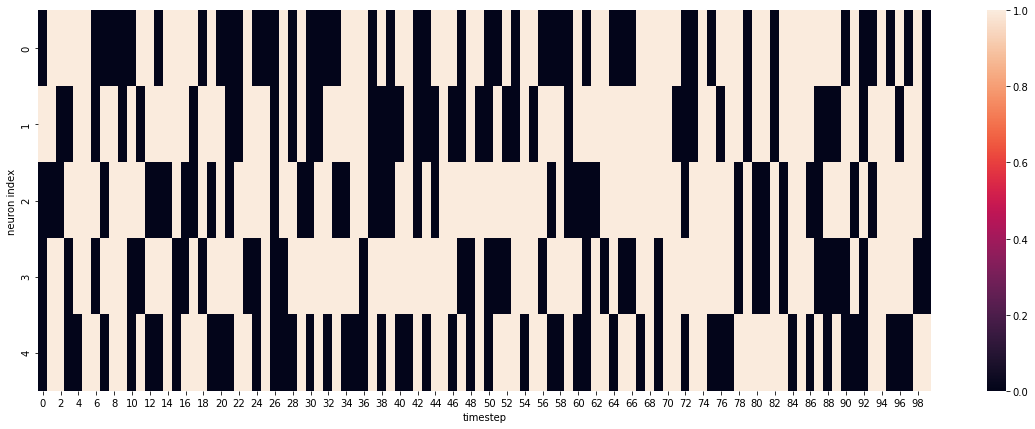

In [168]:
fig, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(spikes[:, :100])
plt.xlabel("timestep")
plt.ylabel("neuron index")

In [742]:
np.sum(spikes[:, :1000], axis = 1)

array([105.,  98.])